In [1]:
import matplotlib.pyplot as plt


In [2]:
from smach_utils_receptionist import *


In [3]:
df=yaml_to_df()
seat_places = df[df['child_id_frame'].str.startswith('seat_place_')]
for index, row in seat_places.iterrows():
    x = row['x']
    y = row['y']
    z = 1.0
    child_id = row['child_id_frame']
    print(f"{child_id}: x = {x}, y = {y}, z = {z}")
    tf_man.pub_static_tf(pos=[x,y,1.0],rot=[0,0,0,1],point_name=child_id)

seat_places

seat_place_1: x = -1.444, y = -1.314, z = 1.0
seat_place_2: x = -1.472, y = -0.761, z = 1.0
seat_place_3: x = -1.484, y = -1.751, z = 1.0
seat_place_4: x = -0.818, y = -1.912, z = 1.0
seat_place_5: x = -1.094, y = 0.107, z = 1.0


,x,y,th,qx,qy,qz,qw,child_id_frame
3,-1.444,-1.314,-3.121,0.0,0.0,-0.999,0.010,seat_place_1
4,-1.472,-0.761,3.093,0.0,0.0,0.999,0.024,seat_place_2
5,-1.484,-1.751,-3.095,0.0,0.0,-0.999,0.023,seat_place_3
6,-0.818,-1.912,-1.511,0.0,0.0,-0.685,0.727,seat_place_4
7,-1.094,0.107,1.582,0.0,0.0,0.711,0.702,seat_place_5


In [3]:
def wait_for_faces_2_tf(timeout=10 , name=''):  #USB CAM JUST F
    
    rospy.sleep(0.3)
    
    start_time = rospy.get_time()
    strings=Strings()
    string_msg= String()
    string_msg.data='Anyone'
    while rospy.get_time() - start_time < timeout:
        req=RecognizeFaceRequest()
        #img=rgbd.get_image()
        #print ('Got  image with shape',img.shape)
        #req.Ids.ids.append(string_msg)
        #img_msg=bridge.cv2_to_imgmsg(img[:,150:-150])
        #req.in_.image_msgs.append(img_msg)


        data = rospy.wait_for_message("/usb_cam/image_raw",Image) 
        img = bridge.imgmsg_to_cv2(data)#, "bgr8")   
        req.in_.image_msgs.append(data)
        res= recognize_face(req)


        #NO FACE FOUND
        if res.Ids.ids[0].data == 'NO_FACE':
            print ('No face FOund Keep scanning')
            
            return None, None
        #AT LEAST ONE FACE FOUND
        else:
            print('at least one face found')
            return res , img
            #    return new_res , img




In [4]:
 #------------------------------------------------------
def wait_for_face(timeout=10 , name=''):
    
    rospy.sleep(0.3)
    
    start_time = rospy.get_time()
    strings=Strings()
    string_msg= String()
    string_msg.data='Anyone'
    while rospy.get_time() - start_time < timeout:
        req=RecognizeFaceRequest()
        #img=rgbd.get_image()
        #print ('Got  image with shape',img.shape)
        #req.Ids.ids.append(string_msg)
        #img_msg=bridge.cv2_to_imgmsg(img[:,150:-150])
        #req.in_.image_msgs.append(img_msg)


        data = rospy.wait_for_message("/usb_cam/image_raw",Image) 
        img = bridge.imgmsg_to_cv2(data)#, "bgr8")   
        req.in_.image_msgs.append(data)
        res= recognize_face(req)


        #NO FACE FOUND
        if res.Ids.ids[0].data == 'NO_FACE':
            print ('No face FOund Keep scanning')
            
            return None, None
        #AT LEAST ONE FACE FOUND
        else:
            print(f'num faces detected{len(res.Ids.ids)}')
            ds_to_faces=[]
            for i , idface in enumerate(res.Ids.ids):
                print (i,idface.data)
                ds_to_faces.append(res.Ds.data[i])    ##
                if (idface.data)==name :
                    new_res= RecognizeFaceResponse()
                    new_res.Ds.data= res.Ds.data[i]
                    new_res.Angs.data= res.Angs.data[i:i+4]
                    new_res.Ids.ids=res.Ids.ids[i].data
                    print('return res,img',new_res)
                    print ('hit',idface.data, 'at' , res.Ds.data[i]  , 'meters')
                    ds_to_faces=[]
                    return new_res , img

            if len (ds_to_faces)!=0:
                i=np.argmin(ds_to_faces)
                new_res= RecognizeFaceResponse()
                new_res.Ds.data= res.Ds.data[i]
                new_res.Angs.data= res.Angs.data[i:i+4]
                new_res.Ids.ids=res.Ids.ids[i].data
                print('return res,img',new_res)
                ds_to_faces=[]
                return new_res , img

In [5]:
res, face_img = wait_for_face()  # default 10 secs
data = rospy.wait_for_message("/usb_cam/image_raw",Image)   #DEBUG REMOVE
img = bridge.imgmsg_to_cv2(data)#, "bgr8")        
print (res)

num faces detected1
0 jack
return res,img Ds: 
  data: 0.7314285635948181
Angs: 
  data: [116.0, 236.0, 270.0, 81.0]
Ids: 
  ids: "jack"
Ds: 
  data: 0.7314285635948181
Angs: 
  data: [116.0, 236.0, 270.0, 81.0]
Ids: 
  ids: "jack"


In [13]:
points= rgbd.get_points()
res, face_img = wait_for_faces_2_tf()  # default 10 secs
res

at least one face found


Ds: 
  data: [0.7211267352104187]
Angs: 
  data: [139.0, 296.0, 268.0, 167.0]
Ids: 
  ids: 
    - 
      data: "jack"

In [38]:
seat_places

,x,y,th,qx,qy,qz,qw,child_id_frame
3,-1.444,-1.314,-3.121,0.0,0.0,-0.999,0.010,seat_place_1
4,-1.472,-0.761,3.093,0.0,0.0,0.999,0.024,seat_place_2
5,-1.484,-1.751,-3.095,0.0,0.0,-0.999,0.023,seat_place_3
6,-0.818,-1.912,-1.511,0.0,0.0,-0.685,0.727,seat_place_4
7,-1.094,0.107,1.582,0.0,0.0,0.711,0.702,seat_place_5


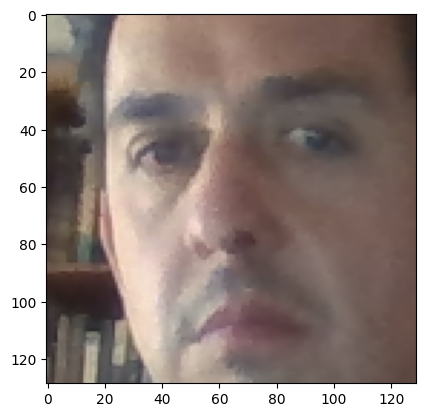

In [8]:
plt.imshow(face_img[int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])])

In [23]:
for i , idface in enumerate(res.Ids.ids):
    bbox=np.asarray(res.Angs.data[4*i:4*i+4],dtype=int)
    cent=[np.nanmean(points['x'][bbox[0]:bbox[2],bbox[3]:bbox[1]]),np.nanmean(points['y'][bbox[0]:bbox[2],bbox[3]:bbox[1]]),np.nanmean(points['z'][bbox[0]:bbox[2],bbox[3]:bbox[1]])]
    
    tf_man.pub_static_tf(pos=cent, point_name=idface.data, ref="head_rgbd_sensor_rgb_frame")
    rospy.sleep(0.1)
    tf_man.change_ref_frame_tf(idface.data)
    rospy.sleep(0.1)
    pose,_= tf_man.getTF(idface.data)
    print (f'face{i} , {idface.data}, bbox {bbox}, cent{cent} ')
    print (seat_places['child_id_frame'].iloc[np.linalg.norm(seat_places[['x','y']].values- pose[:2], axis=1).argmin()])
    
    

face0 , jack, bbox [139 296 268 167], cent[-0.39914313, -0.13225105, 2.0515797] 
seat_place_3


In [4]:
head.turn_base_gaze2(tf = 'seat_place_1', to_gaze = 'base_link')

True

In [16]:
seat_places['child_id_frame'].iloc[np.linalg.norm(seat_places[['x','y']].values- pose[:2], axis=1).argmin()]

'seat_place_3'

In [ ]:
#plt.imshow(face_img[142:365,0:216])
plt.imshow(face_img[bbox[0]:bbox[2],bbox[3]:bbox[1]])

In [ ]:
bbox=np.asarray(res.Angs.data[i:i+4],dtype=int)
bbox

In [ ]:
points= rgbd.get_points()

In [ ]:
cent=np.asarray((np.mean(points['x'][int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])]),np.mean(points['y'][int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])]),np.mean(points['z'][int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])])))
tf_man.pub_static_tf(pos= cent , rot=[0,0,0,1], ref="head_rgbd_sensor_rgb_frame", point_name=res.Ids.ids[0] )
#rospy.sleep(0.1)
#tf_man.change_ref_frame_tf(res.Ids.ids)

In [ ]:
plt.imshow(rgbd.get_points()['z'][int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])], cmap='prism')

In [ ]:
plt.imshow(face_img[int(res.Angs.data[0]):int(res.Angs.data[2]),int(res.Angs.data[3]):int(res.Angs.data[1])])

In [ ]:
plt.imshow(img[239:368,96:225,:])

In [ ]:
res


In [ ]:
data = rospy.wait_for_message("/usb_cam/image_raw",Image)   #DEBUG REMOVE
img = bridge.imgmsg_to_cv2(data)#, "bgr8")                  #DEBUG REMOVE
req=RecognizeFaceRequest()
print ('Got  image with shape',img.shape)
#req.Ids.ids.append(string_msg)
#img_msg=bridge.cv2_to_imgmsg(img[:,150:-150])
#req.in_.image_msgs.append(img_msg)
req.in_.image_msgs.append(data)

In [ ]:
plt.imshow(img)

In [ ]:
import face_recognition


In [ ]:
face_locations=face_recognition.face_locations(img)


In [ ]:
face_locations[0]

In [ ]:
analyze_face_from_image(img,'jack')

In [ ]:
description=analyze_face_from_image(img,'jack')
description

In [ ]:
Angs=[]
if len (face_locations)>0:


        print ('faces found ->', len (face_locations))

        for face_location in face_locations:


                Angs.append( int (face_location[0]) )#Bounding Box
                Angs.append( int (face_location[1]) )#Bounding Box
                Angs.append( int (face_location[2]) )#Bounding Box
                Angs.append( int (face_location[3]) )#Bounding Box



In [ ]:
Angs

In [10]:
file_name    = rospy.get_param("file_name", "/known_locations.yaml")

In [11]:
def yaml_to_df():
    con = read_yaml(known_locations_file =file_name)
    values=[]
    locations=[]
    for c in con:
        locations.append(c)

        for i in range(len(con[c])):
            values.append(list(con[c][i].values())[0])

    data=np.asarray(values).reshape((int(len(values)/7),7))    #x , y ,theta  ,quat   since z always 0
    df= pd.DataFrame( data)
    df.columns=['x','y','th','qx','qy','qz','qw']
    df['child_id_frame']=locations
    return df



In [12]:
df=yaml_to_df()

In [13]:
seat_places = df[df['child_id_frame'].str.startswith('seat_place_')]

In [49]:
for index, row in seat_places.iterrows():
    x = row['x']
    y = row['y']
    z = 1.0
    child_id = row['child_id_frame']
    print(f"{child_id}: x = {x}, y = {y}, z = {z}")
    tf_man.pub_static_tf(pos=[x,y,1.0],rot=[0,0,0,1],point_name=child_id)


seat_place_1: x = -1.444, y = -1.314, z = 1.0
seat_place_2: x = -1.472, y = -0.761, z = 1.0
seat_place_3: x = -1.484, y = -1.751, z = 1.0
seat_place_4: x = -0.818, y = -1.912, z = 1.0
seat_place_5: x = -1.094, y = 0.107, z = 1.0


In [14]:
seat_places['child_id_frame'].iloc[np.linalg.norm(seat_places[['x','y']].values- pose[:2], axis=1).argmin()]

NameError: name 'pose' is not defined

In [ ]:
seat_places

In [18]:
np.linalg.norm(seat_places[['x','y']].values- pose[:2], axis=1)

array([8.27414564, 8.12120091, 8.47579472, 7.93961805, 7.53947916])

In [21]:
for seat_D in np.linalg.norm(seat_places[['x','y']].values- pose[:2], axis=1):
    if seat_D < 0.3:print (seat_D)

In [46]:
for row in seat_places:
    print(row)

x
y
th
qx
qy
qz
qw
child_id_frame


In [2]:
place='seat_place_'+str(1)

In [3]:
place

'seat_place_1'